## House Sale Price Prediction using Baseline Decision Tree and Random Forest Regressors

In [66]:
import numpy as np # Numerical data manipulation
import pandas as pd # data processing, CSV file I/O 
import seaborn as sns #data visualization
sns.set_context('notebook')
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,GridSearchCV, KFold,RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor  #Baseline Decision Tree Model
from sklearn.ensemble import RandomForestRegressor  #Ensemble Bagging Algorithm
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
plt.rcParams["figure.autolayout"] = False
plt.style.use('seaborn')
# palette ="muted" #palatte='pastel'
sns.set_theme(style="whitegrid", palette="muted")
#sns.set(style="whitegrid", palette="pastel", color_codes=True)
palette = itertools.cycle(sns.color_palette())
colors = plt.rcParams["axes.prop_cycle"]()
c = next(colors)["color"]

###  Training and testing datasets are taken from Kaggle- House Sale Price Regression Data

In [15]:
train = pd.read_csv("HousePriceRegressiontrain.csv")
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Step-1 Exploratory Data Analysis and Data Preprocessing

In [92]:
X_test = pd.read_csv("HousePriceRegressiontest.csv")
X_test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [62]:
train.info()   ##Data Description

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [45]:
train.describe()  ##Data Statistics

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


array([[<AxesSubplot:title={'center':'Id'}>,
        <AxesSubplot:title={'center':'MSSubClass'}>,
        <AxesSubplot:title={'center':'LotFrontage'}>,
        <AxesSubplot:title={'center':'LotArea'}>,
        <AxesSubplot:title={'center':'OverallQual'}>,
        <AxesSubplot:title={'center':'OverallCond'}>],
       [<AxesSubplot:title={'center':'YearBuilt'}>,
        <AxesSubplot:title={'center':'YearRemodAdd'}>,
        <AxesSubplot:title={'center':'MasVnrArea'}>,
        <AxesSubplot:title={'center':'BsmtFinSF1'}>,
        <AxesSubplot:title={'center':'BsmtFinSF2'}>,
        <AxesSubplot:title={'center':'BsmtUnfSF'}>],
       [<AxesSubplot:title={'center':'TotalBsmtSF'}>,
        <AxesSubplot:title={'center':'1stFlrSF'}>,
        <AxesSubplot:title={'center':'2ndFlrSF'}>,
        <AxesSubplot:title={'center':'LowQualFinSF'}>,
        <AxesSubplot:title={'center':'GrLivArea'}>,
        <AxesSubplot:title={'center':'BsmtFullBath'}>],
       [<AxesSubplot:title={'center':'BsmtHalfBath'

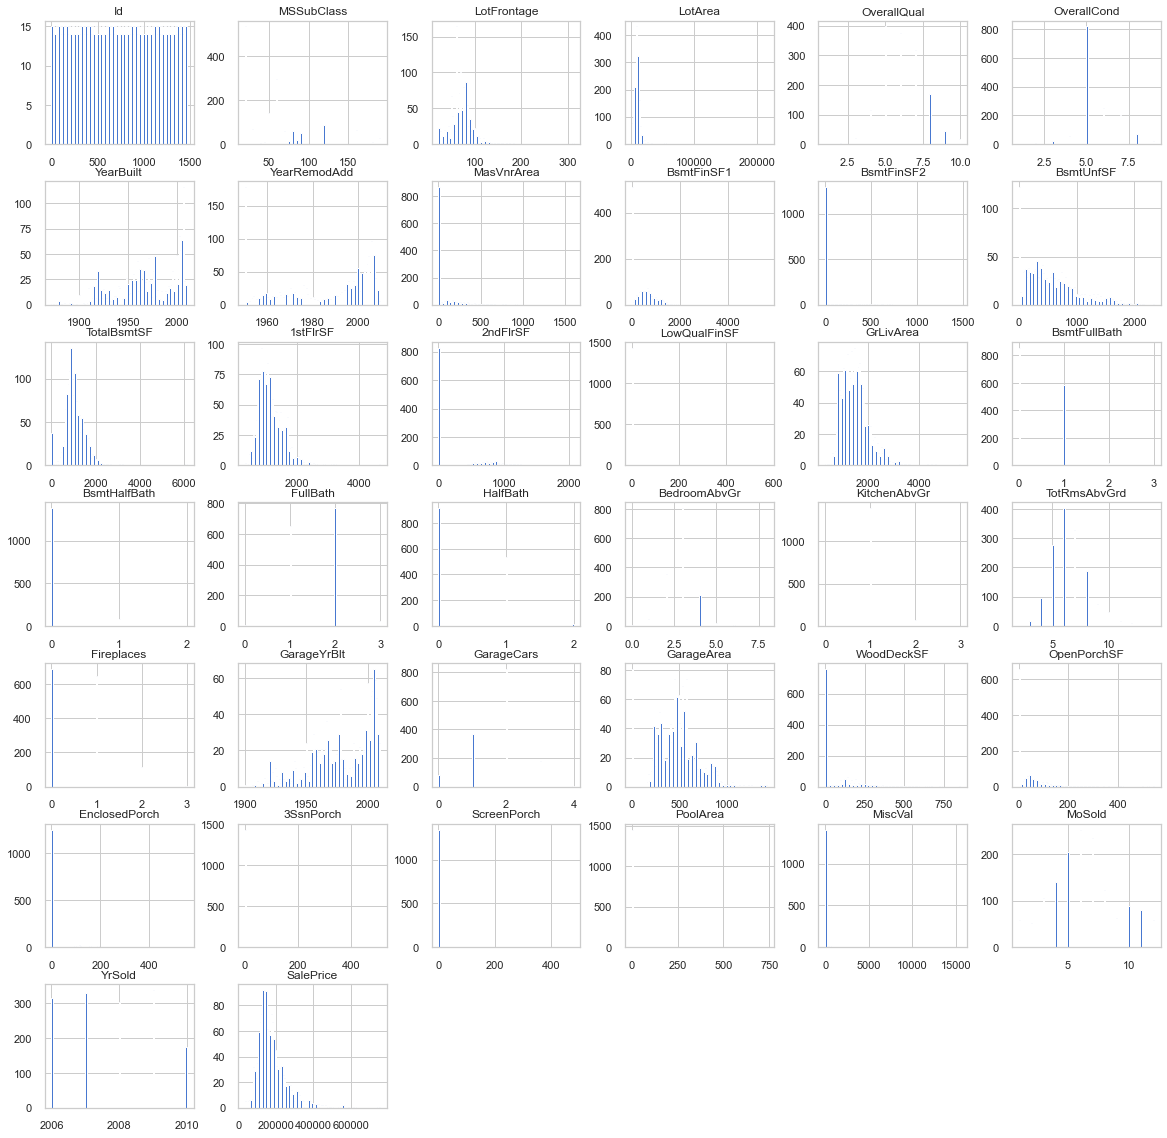

In [55]:
#Distributions of numerical features
train.hist(figsize=(20,20), bins=100)
#Numerical columns have skewed data distribution

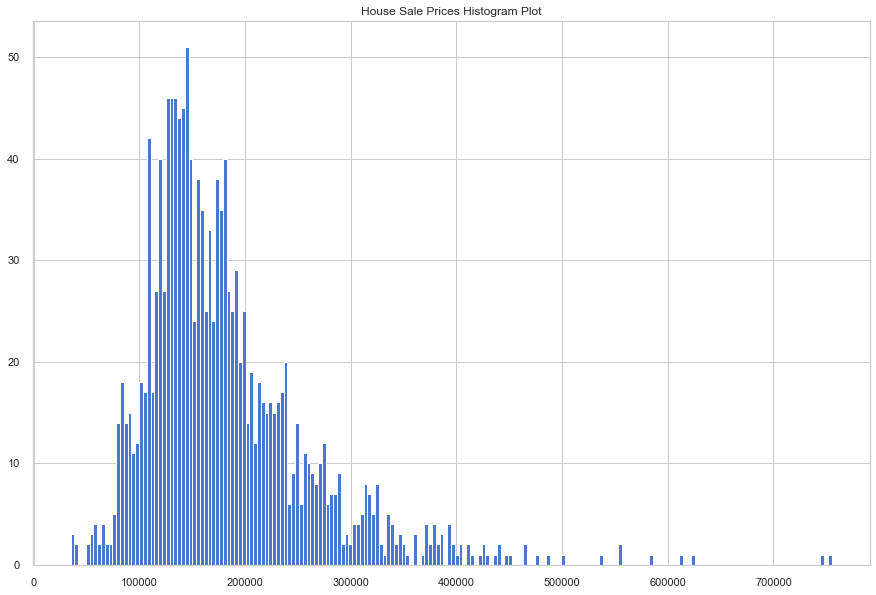

In [26]:
#Distributions of ouput feature
train['SalePrice'].hist(bins = 200, rwidth = 1.5,figsize =(15,10))
plt.title('House Sale Prices Histogram Plot')
plt.show()
##It shows that most houses are in range beween 100,000 and 200,000. Sale Price clearly has a Right Skewed Distribution.

In [59]:
#fig, ax = plt.subplots(figsize=(30,20))
corr_matrix = train.corr()
strong_corr_matrix = corr_matrix[((corr_matrix > 0.6) | (corr_matrix < -0.6)) & (corr_matrix != 1.0)]
#sns.heatmap(strong_corr_matrix, annot=True, linewidths=.5, ax=ax,center=0)
strong_corr_df = strong_corr_matrix.unstack().sort_values().drop_duplicates()
strong_corr_df

OverallQual   GarageCars      0.600671
SalePrice     1stFlrSF        0.605852
HalfBath      2ndFlrSF        0.609707
SalePrice     TotalBsmtSF     0.613581
TotRmsAbvGrd  2ndFlrSF        0.616423
GarageArea    SalePrice       0.623431
FullBath      GrLivArea       0.630012
GarageCars    SalePrice       0.640409
YearRemodAdd  GarageYrBlt     0.642277
BsmtFullBath  BsmtFinSF1      0.649212
BedroomAbvGr  TotRmsAbvGrd    0.676620
2ndFlrSF      GrLivArea       0.687501
GrLivArea     SalePrice       0.708624
SalePrice     OverallQual     0.790982
TotalBsmtSF   1stFlrSF        0.819530
GrLivArea     TotRmsAbvGrd    0.825489
YearBuilt     GarageYrBlt     0.825667
GarageCars    GarageArea      0.882475
Id            Id                   NaN
dtype: float64

GrLivArea, OverallQual and GarageCars have highest correlations with ouput SalePrice        

In [44]:
sale_month_yr = train.groupby(['MoSold']).count()
sale_month_yr ##Hense 6 & 7 Months had hightest number of houses sold

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,YrSold,SaleType,SaleCondition,SalePrice
MoSold,,,,,,,,,,,,,,,,,,,,,
1,58,58,58,49,58,58,3,58,58,58,...,58,58,2,12,1,58,58,58,58,58
2,52,52,52,44,52,52,2,52,52,52,...,52,52,0,12,0,52,52,52,52,52
3,106,106,106,82,106,106,8,106,106,106,...,106,106,1,18,5,106,106,106,106,106
4,141,141,141,119,141,141,12,141,141,141,...,141,141,0,25,5,141,141,141,141,141
5,204,204,204,162,204,204,7,204,204,204,...,204,204,0,44,9,204,204,204,204,204
6,253,253,253,199,253,253,23,253,253,253,...,253,253,0,49,8,253,253,253,253,253
7,234,234,234,200,234,234,12,234,234,234,...,234,234,3,41,8,234,234,234,234,234
8,122,122,122,103,122,122,11,122,122,122,...,122,122,1,22,7,122,122,122,122,122
9,63,63,63,57,63,63,4,63,63,63,...,63,63,0,9,3,63,63,63,63,63


### Missing Values (NaN) Imputation, Data Normalization and Feature Encoding

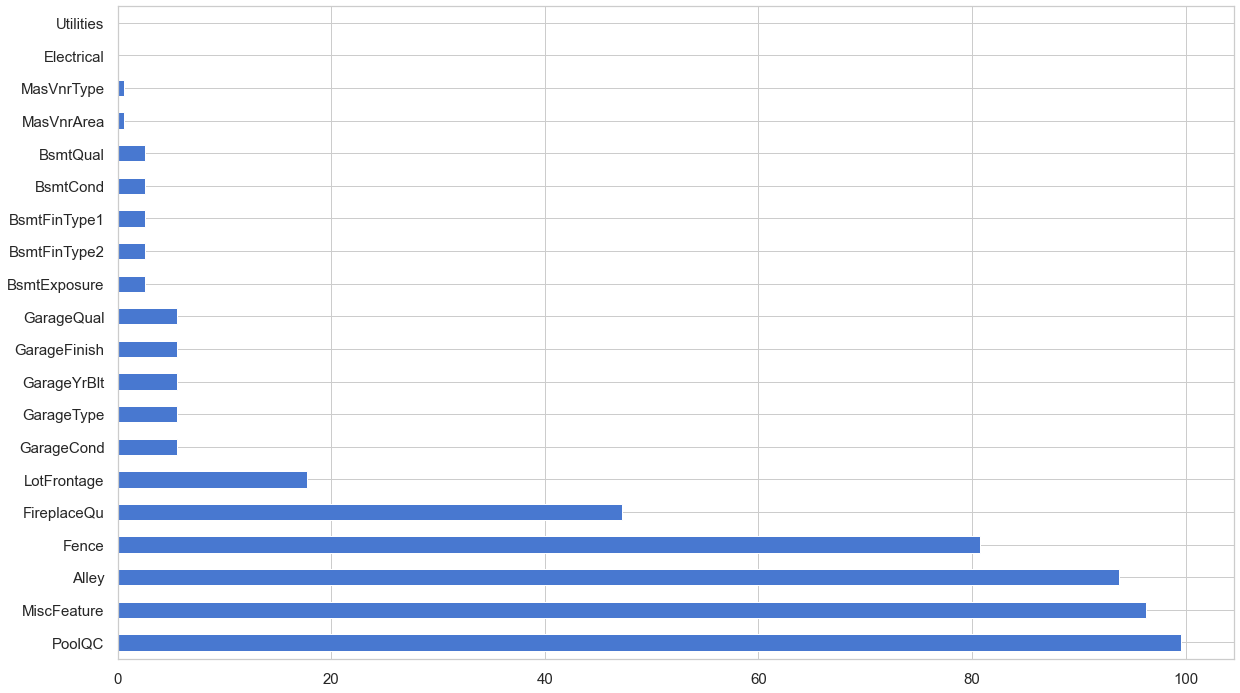

In [50]:
null_count= train.isnull().sum()*100/len(train)
null_percent_plot = null_count.sort_values(ascending=False).head(20).plot(kind='barh',figsize=(20,12),fontsize=15)

In [58]:
null_count_test = X_test.isnull().sum().sort_values(ascending=False).head(20)
null_count_test

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageCond        78
GarageQual        78
GarageYrBlt       78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtQual          44
BsmtExposure      44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtHalfBath       2
dtype: int64

In [63]:
percent = 10.00
threshold = int(((100-percent)/100)*train.shape[0] + 1)
train_set = train.dropna(axis=1, thresh=threshold)
test_set = X_test.dropna(axis=1, thresh=threshold)
train_set

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [71]:
X_train = train_set.drop(['SalePrice'], axis=1)
y_train = train_set.SalePrice
X_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'Enclos

In [75]:
# Since most of numerical features are left and right skewed, median imputation strategy is preferred.
# Standard scaler is used to normalize the skewed data to normal distribution
# Categorical features are encoded using popular One hot encoding to create binary dummy columns for each unique category

train_cat = X_train.select_dtypes(include='object').columns
train_num = X_train.select_dtypes(exclude='object').columns


### Train Validate Data split

In [100]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.20, random_state= 15, shuffle=True)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((934, 74), (234, 74), (934,), (234,))

In [108]:
pipeline_num = Pipeline([
        ('num_imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

pipeline_cat = Pipeline([
        ('cat_imputer', SimpleImputer(strategy="most_frequent")),
        ('one_hot_enc', OneHotEncoder(sparse=False, handle_unknown='ignore')),
])

pipeline_full = ColumnTransformer([
        ("num", pipeline_num, train_num),
        ("cat", pipeline_cat, train_cat),
    ])

In [109]:
X_norm = pipeline_full.fit_transform(X_train)
X_norm

array([[-0.43782571,  0.1054883 ,  0.04878277, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.28643313, -0.14206464,  0.41478277, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.74093171,  2.58101773, -1.06893402, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [-0.70108943,  2.58101773, -1.05157854, ...,  0.        ,
         0.        ,  0.        ],
       [-0.85288113, -0.88472347, -0.12831401, ...,  0.        ,
         1.        ,  0.        ],
       [ 1.33386803,  1.59080596, -0.5812095 , ...,  0.        ,
         1.        ,  0.        ]])

### Baseline Decision Tree Regressor Fit and Validation

In [128]:
model_dt = DecisionTreeRegressor(random_state=15)
model_dt.fit(X_norm, y_train)
X_val_norm = pipeline_full.transform(X_val)
y_val_pred = model_dt.predict(X_val_norm)
RMSE = mean_squared_error(y_val, y_val_pred,squared=False)
R2_score = (r2_score(y_val, y_val_pred))*100
print('DT RMSE', RMSE)
print('DT Model Accuracy in R2_score % ', R2_score)
print('DT NRMSE in %', RMSE/(y_val.max()-y_val.min())*100 )

DT RMSE 42420.56843431731
DT Model Accuracy in R2_score %  65.20564942352574
DT NRMSE in % 8.43183630179235


### GridSearch Parameter Tuning for Random Forest Bagging Algorithm

In [110]:
param_grid = {'n_estimators': [50,100,150,300,500],
              'min_samples_split': [1,2,3],
              'warm_start':[True,False]}

kfold = StratifiedKFold(n_splits= 3, shuffle=True, random_state= 15)

grid_search_CV = GridSearchCV(estimator = RandomForestRegressor(), param_grid=param_grid, 
                             scoring='neg_root_mean_squared_error', cv=kfold, n_jobs=-1, verbose=10)

grid_search_CV.fit(X_norm, y_train)
#print(np.sqrt(-best.best_score_),best.best_estimator_,best.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(("The least populated class in y has only %d"
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0742s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Batch computation too slow (2.1041s.) Setting batch_size=1.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  75 out of  90 | elapsed:   24.1s remaining:    4.7s
[Parallel(n_jobs=-1)]: Done  85 out of  90 | elapsed:   33.3s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  90 out of  90 | el

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=15, shuffle=True),
             estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'min_samples_split': [1, 2, 3],
                         'n_estimators': [50, 100, 150, 300, 500],
                         'warm_start': [True, False]},
             scoring='neg_root_mean_squared_error', verbose=10)

In [111]:
print(grid_search_CV.best_estimator_)

# Get the best combination of parameters
print('Best Hyperparameters',grid_search_CV.best_params_)

# Print the evaluate scores:
cv_scores = grid_search_CV.cv_results_
for mean_score, params in zip(cv_scores["mean_test_score"], cv_scores["params"]):
    print(np.sqrt(-mean_score), params)

RandomForestRegressor(warm_start=True)
Best Hyperparameters {'min_samples_split': 2, 'n_estimators': 100, 'warm_start': True}
nan {'min_samples_split': 1, 'n_estimators': 50, 'warm_start': True}
nan {'min_samples_split': 1, 'n_estimators': 50, 'warm_start': False}
nan {'min_samples_split': 1, 'n_estimators': 100, 'warm_start': True}
nan {'min_samples_split': 1, 'n_estimators': 100, 'warm_start': False}
nan {'min_samples_split': 1, 'n_estimators': 150, 'warm_start': True}
nan {'min_samples_split': 1, 'n_estimators': 150, 'warm_start': False}
nan {'min_samples_split': 1, 'n_estimators': 300, 'warm_start': True}
nan {'min_samples_split': 1, 'n_estimators': 300, 'warm_start': False}
nan {'min_samples_split': 1, 'n_estimators': 500, 'warm_start': True}
nan {'min_samples_split': 1, 'n_estimators': 500, 'warm_start': False}
182.4832195640504 {'min_samples_split': 2, 'n_estimators': 50, 'warm_start': True}
184.44654041080582 {'min_samples_split': 2, 'n_estimators': 50, 'warm_start': False}
181

In [112]:
# Get the Best Final model from Gridsearch with the .best_estimator_
best_model_rf = grid_search_CV.best_estimator_

### Model Performance Validation and Testing

In [122]:
# Random Forest Model Validation
# Apply same Data normalization and Encoding techniques on Validation dataset
X_val_norm = pipeline_full.transform(X_val)
y_val_pred = best_model_rf.predict(X_val_norm)
RMSE = mean_squared_error(y_val, y_val_pred,squared=False)
R2_score = (r2_score(y_val, y_val_pred))*100
print('RMSE', RMSE)
print('Model Accuracy in R2_score % ', R2_score)
print('NRMSE in %', RMSE/(y_val.max()-y_val.min())*100 )

RMSE 29211.05622887267
Model Accuracy in R2_score %  83.50127860614892
NRMSE in % 5.806212726867952


In [95]:
# Random Forest Model Testing
X_test = test_set
# Apply same Data normalization and Encoding techniques on Test dataset

X_test_norm = pipeline_full.transform(X_test)
y_predictions = best_model_rf.predict(X_test_norm)
df_predictions = pd.DataFrame(zip(X_test['Id'], y_predictions),columns=['Id', 'SalePrice'])
df_predictions

,Id,SalePrice
0,1461,127760.333333
1,1462,155911.333333
2,1463,176978.446667
3,1464,182138.880000
4,1465,200378.600000
...,...,...
1454,2915,84340.666667
1455,2916,86651.140000
1456,2917,152315.426667
1457,2918,113931.666667


#### Hence Random forest Bagging ensemble resulted in better performance than Baseline Decision Tree Regressor